
<center><h2>Matrix Squaring, Trotter and Path-Integral Quantum Monte Carlo</h2></center>
<center><h3>Tarea #2 - Física Estadística</h3></center>
<center><h3>Profesor: Johans Restrepo</h3></center>

<center><h3>Por: Jorge Cárdenas</h3></center>

<center><h5>Universidad de Antioquia, MSc in Physics</h5></center>




In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl
%matplotlib inline

## 1. Matrix Squaring

### 1.1. Cálculo de $\pi(x)$ para un $\beta$ alto (Bajas temperaturas)

In [2]:
#Definición de la funciónd de matriz densidad partícula libre
def rho_free(x,xp,beta):
    return (math.exp(-(x-xp)**2/(2.0*beta))/math.sqrt(2.0*math.pi*beta))


#Definición de la función de matriz fórmula de trotter
def rho_harmonic_trotter(grid, beta):
    return np.array([[rho_free(x,xp,beta)*np.exp(-0.5*beta*0.5*(x**2+xp**2)) for x in grid] for xp in grid])



"""Convolution method"""
def convolution(dx,beta_0, final_beta,nx):
    
    
    x=[i*dx for i in range(-(nx-1)//2,(nx//2) + 1)]
    beta = 2.0**2 #Definición de temperatura baja
    """Cálculo de la matrix densidad para 
    un set de valores de beta"""

    rho=rho_harmonic_trotter(x,beta_0)
    beta_tmp=beta_0

    """calculate the convolution considering
    multiple final values of beta"""
    
    for beta in final_beta:
        
        """Here we iterate until getting the to the desired value
        of beta from a high temperature beta"""
        while beta_tmp < beta:


            #Aquí tenemos el integrando que corresponde 
            #con el producto de las matrices densidad 
            #a diferentes valores de beta y 
            rho= np.dot(rho,rho) 
            rho *= dx
            beta_tmp*= 2.0

            """Expresión de la función partición dada por la integral de 
            matrix densidad"""

        Z = sum(rho[j,j] for j in range(nx+1))*dx

        """Cálculo de la densidad de probabilidad"""
        pi_of_x=[rho[j,j] / Z for j in range(nx+1)]
        
        
        """Saving all calculated values of Z for
        multiple betas and multiple discretization values dx"""

        f= open('dat_files/data_harm_matrixsquaring_beta'+str(beta_tmp) +"_nx"+str(nx)+"_b0"+str(beta_0) +'.dat','w')
        for j in range(nx+1):
            f.write(str(x[j])+' '+str(rho[j,j]/Z)+'\n')

        f.close()


"""
Run a convolution for [0.5,1.0,2.0,4.0,8.0,16.0] betas
"""

x_max=5.0
nx=2200
dx=2.0*x_max/(nx-1)
beta_tmp=2.0**(-5) #definición del reciproco de la temperatura alta
final_beta=[0.5,1.0,2.0,4.0,8.0,16.0]

convolution(dx,beta_tmp,final_beta,nx)



<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Gráfico de $\pi(x)$, considerandos multiples valores de $\beta$</p>




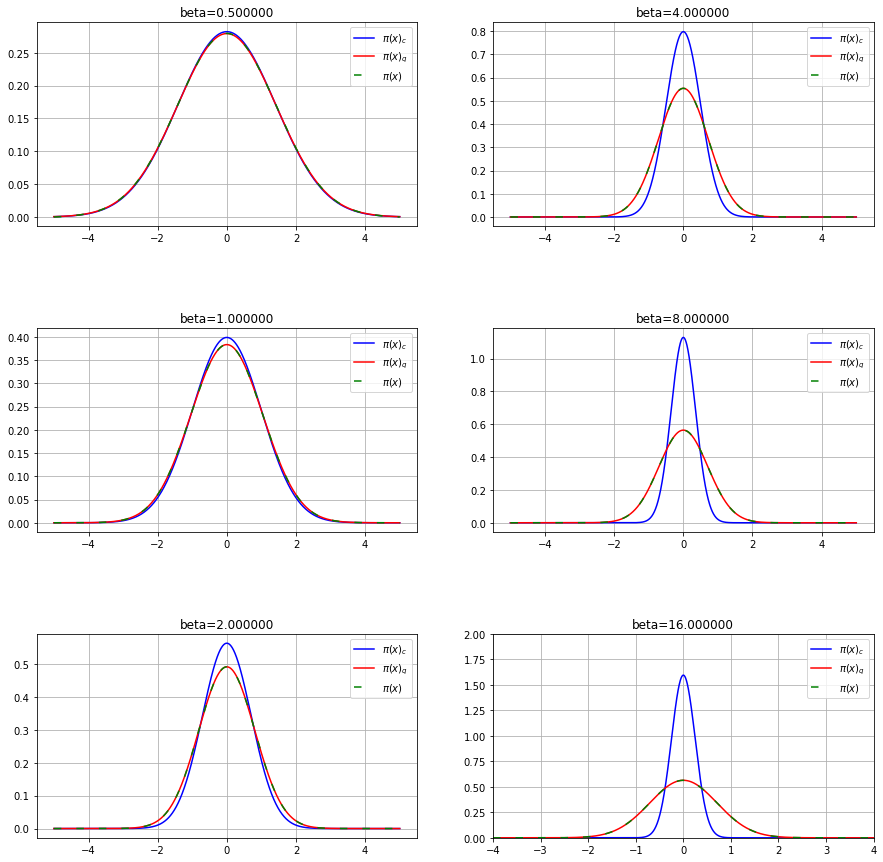

In [3]:

""" función para cálculod e distribución clásica"""
def pi_classic(x,beta):
    return np.sqrt(beta/(2*np.pi))*np.exp(-beta*(np.square(x))/2)


""" función para cálculod e distribución cuántica"""
def pi_quant(x,beta):
    return np.sqrt(math.tanh(beta/2)/np.pi)*np.exp(-np.square(x) * math.tanh(beta/2))


"""Ploteo"""

ncols=2 #número de columnas de plots
nrows = 3 #número de filas

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

counter=0

x=[i*dx for i in range(-(nx-1)//2,(nx//2) + 1)]


for col in range(0,ncols):
    for row in range(0,nrows):
        beta=final_beta[counter]
        counter += 1

        """ Carga de resultados de la sección anterior par diferentes beta"""

        pi_x = np.loadtxt('dat_files/data_harm_matrixsquaring_beta'+str(beta)+'_nx2200_b00.03125'+'.dat', unpack = True)

        pi_c=pi_classic(x,beta)
        pi_q=pi_quant(x,beta)


        
        axs[row,col].plot(x, pi_c, linestyle='-', color='blue', label = r"$\pi(x)_c$")
        axs[row,col].plot(x, pi_q, linestyle='-', color='red', label = r"$\pi(x)_q$")
        axs[row,col].plot(x, pi_x[1], linestyle=(0, (5, 10)), color='green', label = r"$\pi(x)$")

        axs[row,col].title.set_text('beta=%f'%(beta))
        axs[row,col].grid()
        axs[row,col].legend(loc=1, prop={'size': 10})
        plt.grid(True)
        plt.xlim([-4, 4])
        plt.ylim([0, 2])
    

fig.savefig('plots/dist_betas.png')

plt.show()


### 1.1. Cálculo de $\pi(x)$ modificando el $\beta$ inicial

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Aquí estudiamos el efecto de considerar un valor de $\beta$ inicial. Considerar un beta muy alto puede afectar el resultado. </p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Gráfico de $\pi(x)$, considerandos multiples valores de $\beta$ y de discretización. </p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Eso permite visualizar cual puede ser un buen rango de valores en los que obtengamos el resultado esperado ajustado a $\pi(x)_{quantico}$ para bajas temperaturas. </p>



In [4]:

"""Aquí hacemos el cálculod e la convlución para diferentes
valores de la resolución nx y el valor de beta = 4.0"""

x_max=5.0
nx_array=[10,50,3000]

beta_0_array=[2.0**(-5),2.0**(-2),2.0**(-1),2] #definición del reciproco de la temperatura alta
final_beta=[8.0]

for nx in nx_array:
    for beta_0 in beta_0_array:
        dx=2.0*x_max/(nx-1)
        convolution(dx,beta_0,final_beta,nx)




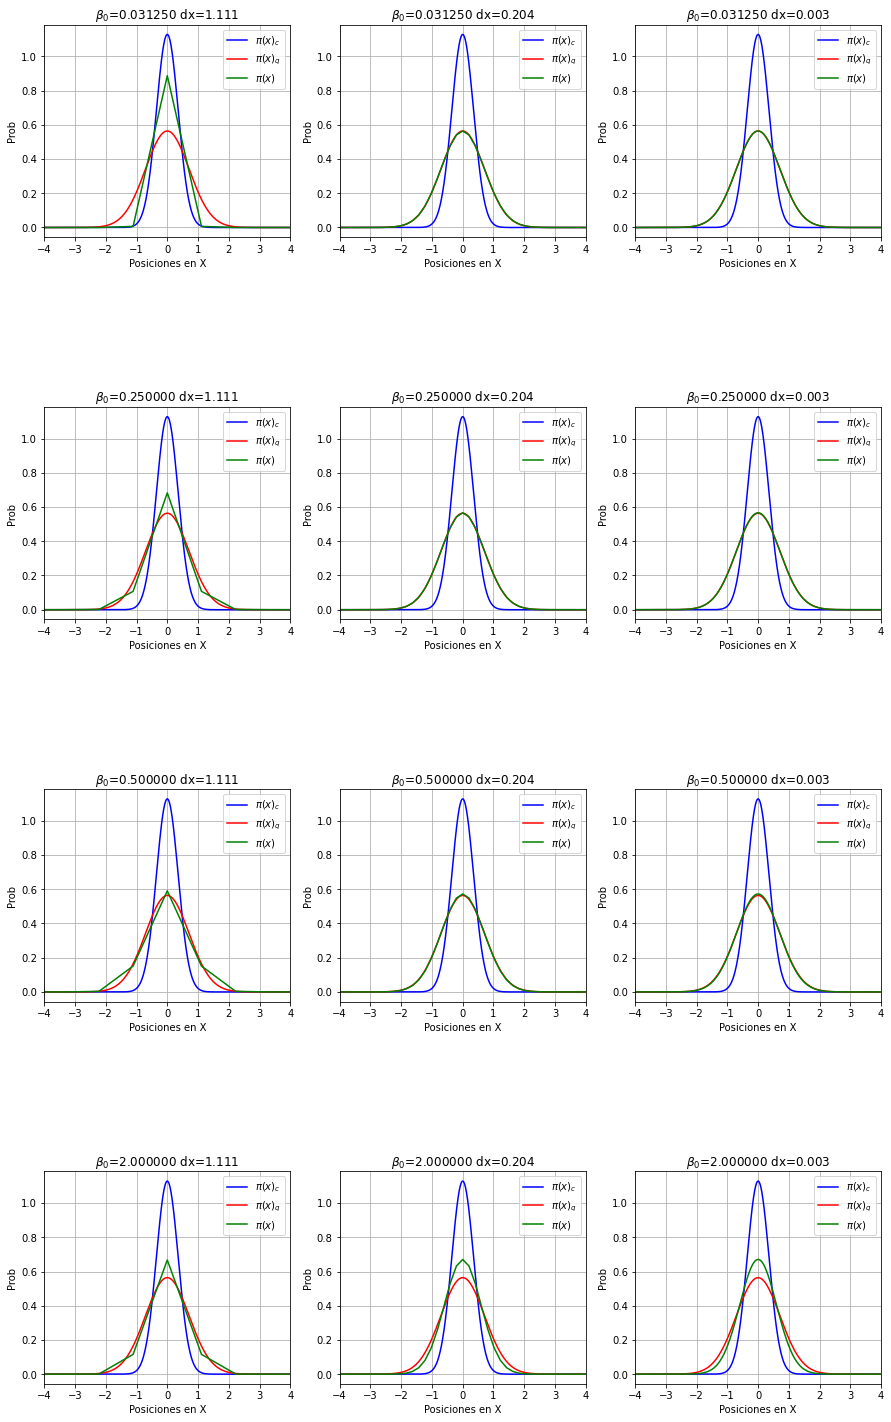

In [5]:
""" función para cálculod e distribución clásica"""
def pi_classic(x,beta):
    return np.sqrt(beta/(2*np.pi))*np.exp(-beta*(np.square(x))/2)


""" función para cálculod e distribución cuántica"""
def pi_quant(x,beta):
    return np.sqrt(math.tanh(beta/2)/np.pi)*np.exp(-np.square(x) * math.tanh(beta/2))


ncols=3 #número de columnas de plots
nrows = 4 #número de filas

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 25))
plt.subplots_adjust(hspace=0.8)

counter=0

x=[i*dx for i in range(-(nx-1)//2,(nx//2) + 1)]


nx_array=[10,50,3000]
beta_0_array=[2.0**(-5),2.0**(-2),2.0**(-1),2] #definición del reciproco de la temperatura alta
final_beta=[4.0,8.0]



for col in range(0,ncols):
    for row in range(0,nrows):
        beta=final_beta[1]
        counter += 1
        nx=nx_array[col]
        dx=2.0*x_max/(nx-1)

        beta_0 = beta_0_array[row]
        
        pi_x = np.loadtxt('dat_files/data_harm_matrixsquaring_beta'+str(beta)+'_nx'+str(nx)+'_b0'+str(beta_0)+'.dat', unpack = True)

        pi_c=pi_classic(x,beta)
        pi_q=pi_quant(x,beta)


        
        axs[row,col].plot(x, pi_c, linestyle='-', color='blue', label = r"$\pi(x)_c$")
        axs[row,col].plot(x, pi_q, linestyle='-', color='red', label = r"$\pi(x)_q$")
        axs[row,col].plot(pi_x[0], pi_x[1], linestyle='-', color='green', label = r"$\pi(x)$")

        axs[row,col].title.set_text(r'$\beta_0$=%f'%(beta_0)+' dx=%.3f'%(dx))
        axs[row,col].grid()
        axs[row,col].legend(loc=1, prop={'size': 10})
        axs[row,col].set_xlim((-4, 4))

    for ax in axs.flat:
        ax.set(xlabel='Posiciones en X', ylabel='Prob')

fig.savefig('plots/dist_betas_nx.png')

plt.show()


### 1.3. Cálculo de $\mathcal{Z}$ con varios valores de $\beta$  


<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Aquí declaramos una función de convolución para invocarla de forma recurrente cuando sea necesario. </p>



In [6]:

#Definición de la funciónd de matriz densidad partícula libre
def rho_free(x,xp,beta):
    return (math.exp(-(x-xp)**2/(2.0*beta))/math.sqrt(2.0*math.pi*beta))


#Definición de la función de matriz fórmula de trotter
def rho_harmonic_trotter(grid, beta):
    return np.array([[rho_free(x,xp,beta)*np.exp(-0.5*beta*0.5*(x**2+xp**2)) for x in grid] for xp in grid])



""" función para cálculod e distribución clásica"""
def pi_classic(x,beta):
    return np.sqrt(beta/(2*np.pi))*np.exp(-beta*(np.square(x))/2)


""" función para cálculod e distribución cuántica"""
def pi_quant(x,beta):
    return np.sqrt(math.tanh(beta/2)/np.pi)*np.exp(-np.square(x) * math.tanh(beta/2))


"""Función para cálculo de la convolución de forma recurrente"""

def convolution(dx,beta_0, final_beta,nx):
    
    zetas=[]
    log_z=[]
    Z=0
    log=0
    x=[]
    x=[i*dx for i in range(-(nx-1)//2,(nx//2) + 10)]
    """Cálculo de la matrix densidad para 
    un set de valores de beta"""

    rho=rho_harmonic_trotter(x,beta_0)
    beta_tmp=beta_0

    for beta in final_beta:
        del rho
        del Z
        
        """Se deben reiniciar las variables para cada ciclo de 
        cálculo """
        
        zetas=[]
        log_z=[]
        Z=0
        log=0
        beta_tmp=beta_0
        
        rho=rho_harmonic_trotter(x,beta_0)
        
        while beta_tmp < beta:


            #Aquí tenemos el integrando que corresponde 
            #con el producto de las matrices densidad 
            #a diferentes valores de beta y 
            
            rho = np.dot(rho,rho)
            rho *= dx
            beta_tmp *= 2.0

            """Expresión de la función partición dada por la integral de 
            matrix densidad"""

        Z = sum(rho[j,j].copy() for j in range(nx+1))*dx
        
    
    return Z
        

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Aquí calculamos el valor de $log(\mathcal{Z})$ consideramos multiples valores de beta final  </p>


In [46]:
"""Cálculo de la convolución para valores de beta en un rango entre 0.1 y 10"""

x_max=5.0
b0=2.0**(-7)
nx=100
dx=0.05

beta_final = np.arange(0.05,30,0.05) #rango de valor de posiciones

zetas ={}
cumulative_beta = 0
beta_final
for beta in beta_final:
    zeta=convolution(dx,b0,[beta],nx)
    zetas[beta]=zeta



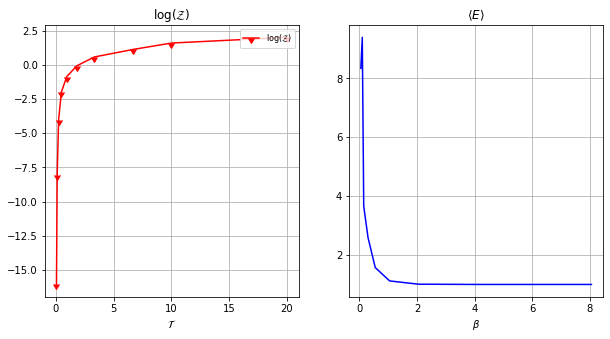

In [65]:

from numpy import diff


fig, axs = plt.subplots( ncols=2,figsize=(10, 5))


#Se crea el listado de los Z obtenidos 
zetas_unique, indicesList_zetas = np.unique(list(zetas.values()), return_index=True)

#array de betas correspondientes a los Z obtenidos
betas = np.array(list(zetas.keys()))
beta_final_filter = betas[indicesList_zetas]

#gráfica respecto el reciproco de los beta, es decir TEMPERATURA
axs[0].plot(np.reciprocal(beta_final_filter),np.log(zetas_unique), linestyle='-',marker=11, color="red",label = r'$\mathrm{log(\mathcal{Z})}\ $')
axs[0].set_title(r'$\mathrm{log(\mathcal{Z})}\ $')

axs[0].grid(True)
axs[0].legend(loc=1, prop={'size': 8})

axs[0].set(xlabel=r'$\mathrm{\mathcal{T}}\ $')
#plt.axhline(y=2, color='r', linestyle='-.')



"""Aquí realizamos la derivación de los dos vectores obtenidos y realizamos la gráfica
para obtener una gráfica del comportamiento de la energía"""

dydx = -diff(np.log(zetas_unique))/diff((beta_final_filter))

axs[1].set_title(r'$\langle E \rangle$')

axs[1].set(xlabel=r'$\beta $')

axs[1].plot(beta_final_filter[1:13], dydx,linestyle='-', color="blue")
axs[1].grid(True)


fig.savefig('plots/Partition_func.png')

plt.show()

## 2. Path Integral Oscilador Armónico

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">En esta sección trabajamos sobre el cálculo de la integral de camino de Feynmann.</p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Creamos un método de python con el cual se puede hacer el cálculo recurrente de la integral de camino para diferentes valores de $\beta$ y N. La función retorna $\Delta \tau$,un array el historial de la exploración (allX), un array con el path final (x), y un arreglo con la información para graficar los histogramas correspondientes a cada unos de los $X_k$ (hist)   </p>


In [ ]:

"""Lectura de los archivos"""
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f: # Read each line of the file
            x, y = line.split()# Split a each line into a list where each word is a list item
            list_x.append(float(x))# Add the data at the end of the "x" array
            list_y.append(float(y))# Add the data at the end of the "y" array
    f.close()
    return list_x, list_y


"""Función para cálculo de matriz densidad de la partícula libre"""
def rho_free(x,y,beta):
    return (math.exp(-(x-y)**2/(2.0*beta))/math.sqrt(2.0*math.pi*beta))



"""Función para cálculo de la integral de camino"""
def path_integral(N):
   
    dtau=beta/N #delta de beta
    delta=1.1
    n_steps=1000000 #Iteraciones del algoritmo Metropolis
    x=np.zeros(N) #init vector of X_k
    allX = [x]
    hist = []
    short_hist=[]
    short_hist.append(np.zeros(N))
    counter=0
    
    for j in range(N):
        hist.append([])
        
    
    for step in range(n_steps):
        k = random.randint(0,N-1)       # Random slice
        knext,kprev = (k+1) % N,(k-1) % N # Next/previous slices

        x_new = x[k] + random.uniform(-delta,delta)  # New position at slice k

        """Calculo del distribución para el valor anterior de X_k"""
        old_weight = (rho_free(x[kprev], x[k], dtau) *
                     rho_free(x[k], x[knext], dtau) *
                     math.exp(-0.5*dtau*x[k]**2))
        
        """Calculo del distribución para el valor Nuevo de X_k"""
        new_weight = (rho_free(x[kprev], x_new, dtau) *
                      rho_free(x_new, x[knext], dtau) *
                      math.exp(-0.5*dtau*x_new**2))
                      

        
        if step % 500 == 0:
            allX.append(x.copy())

        """Aplicación del criterior de aceptación de metropolis
        Aquí es donde se aplica el criterior probabilistico que da 
        validez a la selección o rechazo de un valor de x nuevo"""
        
        if random.uniform(0.0, 1.0) < new_weight/old_weight:
            x[k] = x_new
            counter+=1
            
            if counter<25:
                short_hist.append(x.copy())
                

        # Guardar registros para generacion de histogramas
        if step % 10 == 0:
            hist[k].append(x[k])
        
    
        
    return dtau,allX,x,hist,short_hist

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Comparamos el histograma correpsondiente al muestreo correspondiente a dos valores diferentes de $X_k$. También se incluye el plot de $\pi(X)$ obtenido en la sección anterior para un $\beta=4.0$</p>


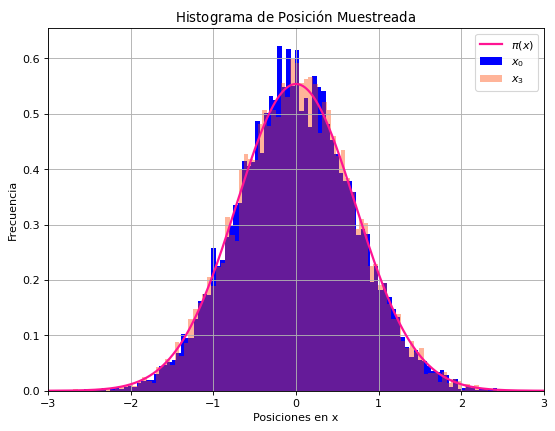

In [22]:


N=10
beta=4.0


"""Invocamos función para el cálculo del path integral"""
dtau,allX,x,hist,short_hist=path_integral(N)

filename='dat_files/data_harm_matrixsquaring_beta4.0_nx2000_b00.03125'+'.dat'
list_x, list_y = read_file(filename)


fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot()

ax.hist(hist[0], density = True, bins = 100,color = "blue",label=r"$ x_0$")
ax.hist(hist[3], density = True, bins = 100,color = "#FF4500",alpha=0.4,label=r"$ x_3$")
ax.plot(list_x, list_y, linestyle='-', color='#FF1493', label = r"$\pi(x)$",linewidth=2)


ax.legend()

plt.xlabel('Posiciones en x')
plt.ylabel('Frecuencia')
plt.title(r'$\mathrm{Histograma\ de\ Posición\ Muestreada}\ $')
plt.grid(True)
plt.xlim([-3,3])

fig.savefig('plots/hist_compare1.png')


plt.show()

   

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Aquí comparamos el histograma de un valor de $X_k$, en este caso $X_0$, con los histogramas de las otras posiciones muestreadas $X_k;k\neq 0$</p>


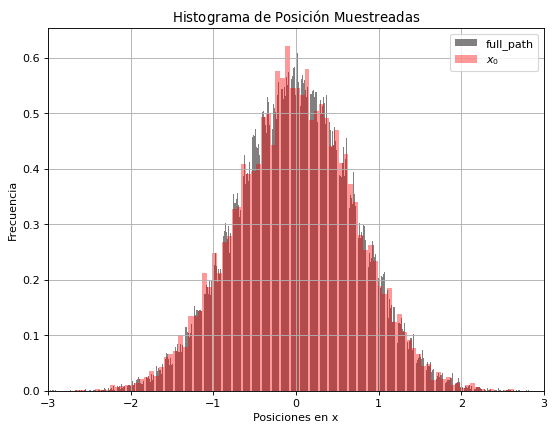

In [12]:
N=10
beta=4.0

"""Invocamos función para el cálculo del path integral"""
dtau,allX,x,hist,short_hist=path_integral(N)

color=["grey"]*9
fig = plt.figure(figsize=(8, 6), dpi=80)

ax = fig.add_subplot()

ax.hist(hist[1:10], density = True,color=color, bins = 50, label="full_path")
ax.hist(hist[0], density = True, bins = 100,color = "red",alpha=0.4,label=r"$ x_0$")

ax.legend()

plt.xlabel('Posiciones en x')
plt.ylabel('Frecuencia')
plt.title(r'$\mathrm{Histograma\ de\ Posición\ Muestreadas\ }\ $')
plt.grid(True)
plt.xlim([-3,3])

fig.savefig('plots/hist_compare_full_path.png')


plt.show()


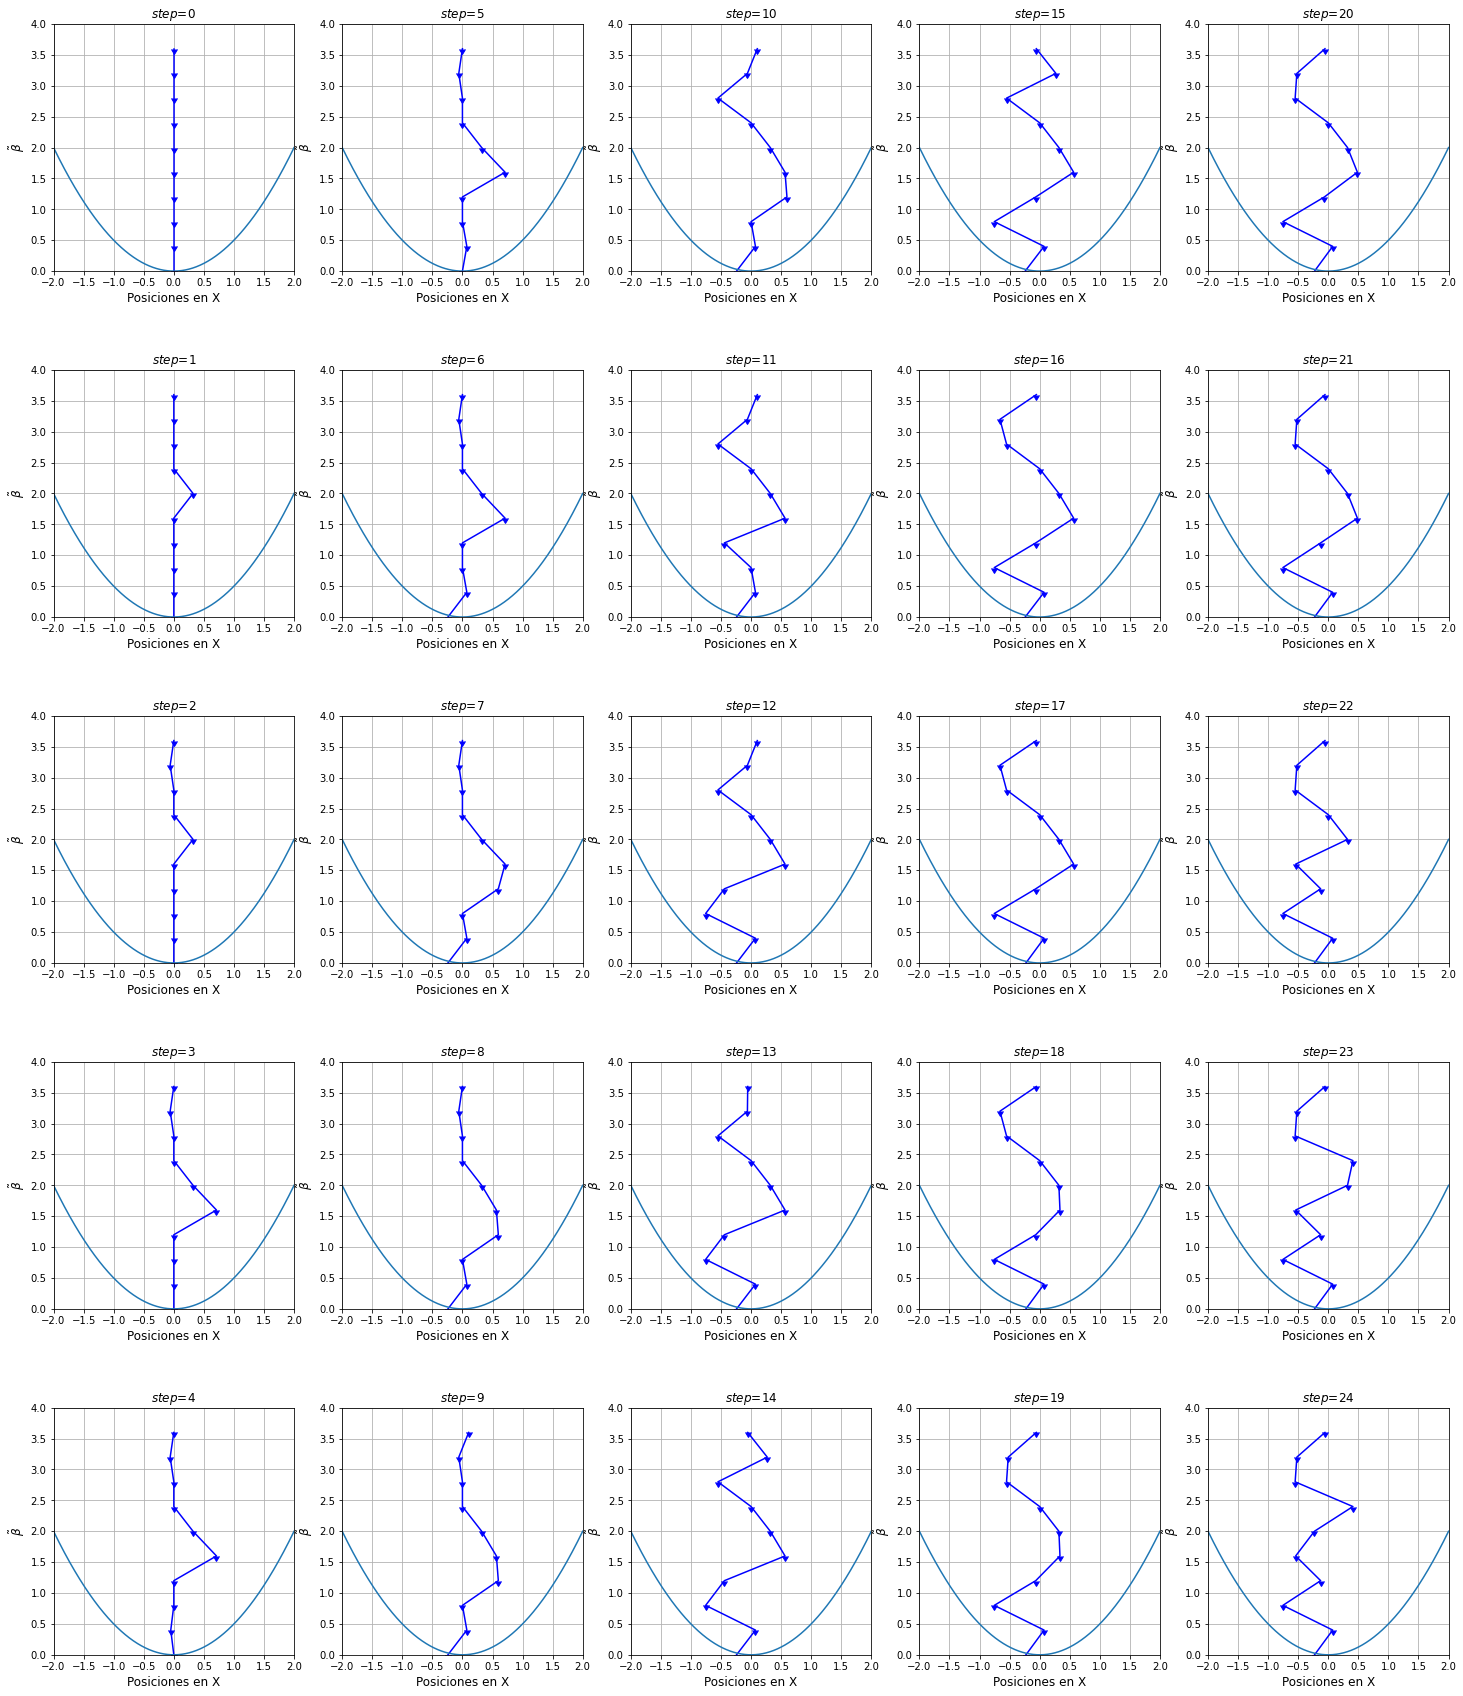

In [13]:
ncols=5 #número de columnas de plots
nrows = 5 #número de filas

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 30))
plt.subplots_adjust(hspace=0.4)

x_values = np.linspace(-2.0, 2.0, 1000)  #rango de posiciones
y_potential = 0.5*x_values**2
counter=0


for col in range(0,ncols):
    for row in range(0,nrows):

        axs[row,col].plot(short_hist[counter],np.arange(0,beta,dtau),marker=11, linestyle='-', color='blue')
        axs[row,col].plot(x_values,y_potential)


        axs[row,col].title.set_text(r'$step$='+str(counter))
        axs[row,col].grid()
        #axs[row,col].legend(loc=1, prop={'size': 10})
        axs[row,col].set_xlim((-2, 2))
        counter += 1
    
    for ax in axs.flat:
        ax.set_xlabel('Posiciones en X',fontsize = 12.0)
        ax.set_ylabel(r'$\tilde{\beta}$',fontsize = 12.0)
        ax.set_xlim([-2,2])
        ax.set_ylim([0, beta])
        
fig.savefig('plots/initial_paths.png')

plt.show()


<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Finalmente presentamos el resultado de la integral de camino para $\beta=4.0$ y tres valores diferentes de N, lo que nos define una partición  $\Delta \tau$ diferente en cada caso. </p>

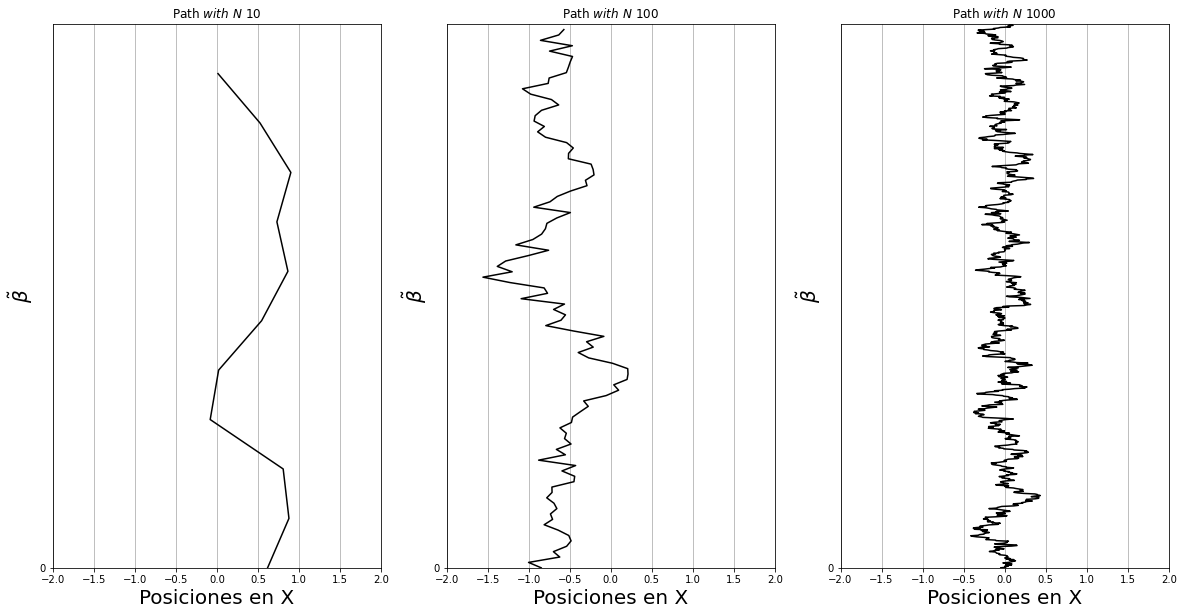

In [14]:

fig, axs = plt.subplots( ncols=3, figsize=(20, 10))
plt.subplots_adjust(hspace=1)

x_values = np.linspace(-4.0, 4.0, 2000)  #rango de posiciones
y_potential = 0.5*x_values**2

N_vals=[10,100,1000]
beta=4.0

for index,N in enumerate(N_vals):
    
    dtau,allX,x,hist,short_hist=path_integral(N+1)
    
    #for path in allX:
    #    axs[index].plot(path,np.arange(0,beta,dtau),alpha=0.6,color='red', linestyle='-')

    axs[index].plot(x,np.arange(0,beta,dtau),color="black", linestyle='-')
   
    axs[index].set_yticks(np.arange(0, beta, step=10))
    axs[index].title.set_text(r'$\mathrm{Path}\ with\  N\ %i $'%N)
    axs[index].grid(True)
    
    #axs[index].plot(x_values,y_potential, label="Pozo de Potencial V(x)=$x^2/2$")
    
for ax in axs.flat:
    ax.set_xlabel('Posiciones en X',fontsize = 20.0)
    ax.set_ylabel(r'$\tilde{\beta}$',fontsize = 20.0)

    ax.set_xlim([-2,2])
    ax.set_ylim([0, beta])

plt.ylim([0, beta])

fig.savefig('plots/paths_harm_osc.png')

plt.show()


## 3.  Oscilador Anarmónico



<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Ecuación del potencial:</p>
$$
    V(x)=\frac{x^2}{2} - x^3 + x^4
$$





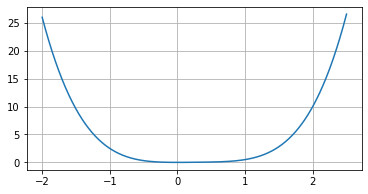

In [15]:
def v_anharmonic(x): 
    return 0.5 * x**2 - x**3 + x**4 

fig, axs = plt.subplots( figsize=(6, 3))

x_values = np.linspace(-2.0, 2.5, 1000)  #rango de posiciones
y_potential = v_anharmonic(x_values)
plt.plot(x_values, y_potential)
plt.grid()


## 3.1. Matrix Squaring

In [16]:
#Definición de la funciónd de matriz densidad partícula libre
def rho_free(x,xp,beta):
    return (math.exp(-(x-xp)**2/(2.0*beta))/math.sqrt(2.0*math.pi*beta))


#Definición de la función de matriz fórmula de trotter
"""Esta función incluye la aplicación del potencial anharmónico"""
def rho_anharmonic_trotter(grid, beta):
    return np.array([[rho_free(x,xp,beta)*np.exp(-0.5*beta*(v_anharmonic(x)+v_anharmonic(xp))) for x in grid] for xp in grid])



"""Convolution method"""
def convolution(dx,beta_0, final_beta,nx):
    
    
    x=[i*dx for i in range(-(nx-1)//2,(nx//2) + 1)]
    beta = 2.0**2 #Definición de temperatura baja
    """Cálculo de la matrix densidad para 
    un set de valores de beta"""

    rho=rho_anharmonic_trotter(x,beta_0)
    beta_tmp=beta_0

    """calculate the convolution considering
    multiple final values of beta"""
    
    for beta in final_beta:
        
        """Here we iterate until getting the to the desired value
        of beta from a high temperature beta"""
        while beta_tmp < beta:


            #Aquí tenemos el integrando que corresponde 
            #con el producto de las matrices densidad 
            #a diferentes valores de beta y 
            rho= np.dot(rho,rho) 
            rho *= dx
            beta_tmp*= 2.0

            """Expresión de la función partición dada por la integral de 
            matrix densidad"""

        Z = sum(rho[j,j] for j in range(nx+1))*dx

        """Cálculo de la densidad de probabilidad"""
        pi_of_x=[rho[j,j] / Z for j in range(nx+1)]
        
        
        """Saving all calculated values of Z for
        multiple betas and multiple discretization values dx"""

        f= open('dat_files/data_anharm_matrixsquaring_beta'+str(beta_tmp) +"_nx"+str(nx)+"_b0"+str(beta_0) +'.dat','w')
        for j in range(nx+1):
            f.write(str(x[j])+' '+str(rho[j,j]/Z)+'\n')

        f.close()


"""
Run a convolution for [0.5,1.0,2.0,4.0,8.0,16.0] betas
"""

x_max=5.0
nx=1000
dx=2.0*x_max/(nx-1)
beta_tmp=2.0**(-5) #definición del reciproco de la temperatura alta
final_beta=[2.0,4.0,8.0]

convolution(dx,beta_tmp,final_beta,nx)



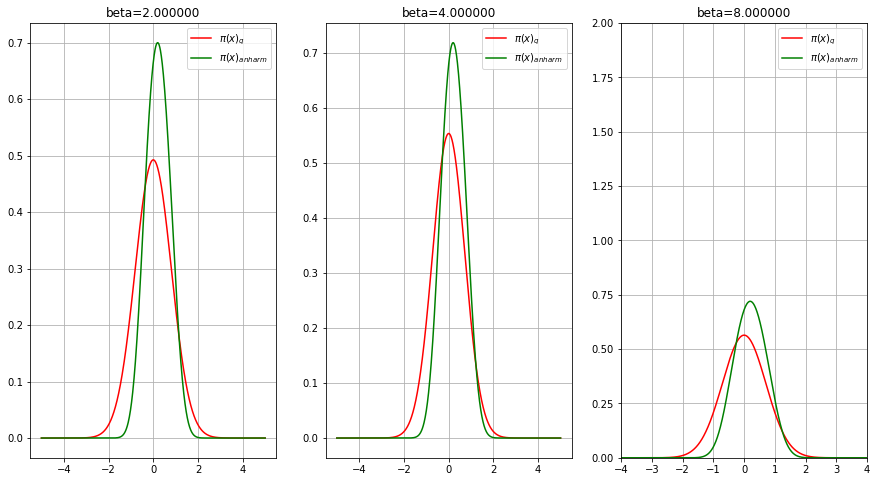

In [17]:


def pi_classic(x,beta):
    return np.sqrt(beta/(2*np.pi))*np.exp(-beta*(np.square(x))/2)

def pi_quant(x,beta):
    return np.sqrt(math.tanh(beta/2)/np.pi)*np.exp(-np.square(x) * math.tanh(beta/2))


ncols=3 #número de columnas de plots
nrows = 1 #número de filas

fig, axs = plt.subplots( ncols=ncols, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5)

counter=0

x=[i*dx for i in range(-(nx-1)//2,(nx//2) + 1)]


for col in range(0,ncols):
    beta=final_beta[counter]
    counter += 1

    pi_x = np.loadtxt('dat_files/data_anharm_matrixsquaring_beta'+str(beta)+'_nx1000_b00.03125'+'.dat', unpack = True)

    pi_q=pi_quant(x,beta)
    

    axs[col].plot(x, pi_q, linestyle='-', color='red', label = r"$\pi(x)_q$")
    axs[col].plot(x, pi_x[1], linestyle='-', color='green', label = r"$\pi(x)_{anharm}$")

    axs[col].title.set_text('beta=%f'%(beta))
    axs[col].grid()
    axs[col].legend(loc=1, prop={'size': 10})
    plt.grid(True)
    plt.xlim([-4, 4])
    plt.ylim([0, 2])
    

fig.savefig('plots/dist_betas_anharm.png')

plt.show()


### 3.2. Path Integral Oscilador Anarmónico

In [18]:

def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f: # Read each line of the file
            x, y = line.split()# Split a each line into a list where each word is a list item
            list_x.append(float(x))# Add the data at the end of the "x" array
            list_y.append(float(y))# Add the data at the end of the "y" array
    f.close()
    return list_x, list_y

def rho_free(x,y,beta):
    return (math.exp(-(x-y)**2/(2.0*beta))/math.sqrt(2.0*math.pi*beta))



"""path integral considerando el potencial anarmónico"""
def path_integral_anharm(N):
   
    dtau=beta/N
    delta=1.1
    n_steps=1000000
    x=np.zeros(N) #init vector of X_k
    allX = [x]
    hist = []
    short_hist=[]
    short_hist.append(np.zeros(N))
    counter=0
    
    for j in range(N):
        hist.append([])
        
    
    for step in range(n_steps):
        k = random.randint(0,N-1)       # Random slice
        knext,kprev = (k+1) % N,(k-1) % N # Next/previous slices

        x_new = x[k] + random.uniform(-delta,delta)  # New position at slice k

        old_weight = (rho_free(x[kprev], x[k], dtau) *
                     rho_free(x[k], x[knext], dtau) *
                     math.exp(-dtau*v_anharmonic(x[k])))

        new_weight = (rho_free(x[kprev], x_new, dtau) *
                      rho_free(x_new, x[knext], dtau) *
                      math.exp(-dtau*v_anharmonic(x_new)))
                      
        
        
        if step % 500 == 0:
            allX.append(x.copy())

        if random.uniform(0.0, 1.0) < new_weight/old_weight:
            x[k] = x_new
            counter+=1
            
            if counter<25:
                short_hist.append(x.copy())
                

        # Guardar registros para generacion de histogramas
        if step % 10 == 0:
            hist[k].append(x[k])
        
    
        
    return dtau,allX,x,hist,short_hist

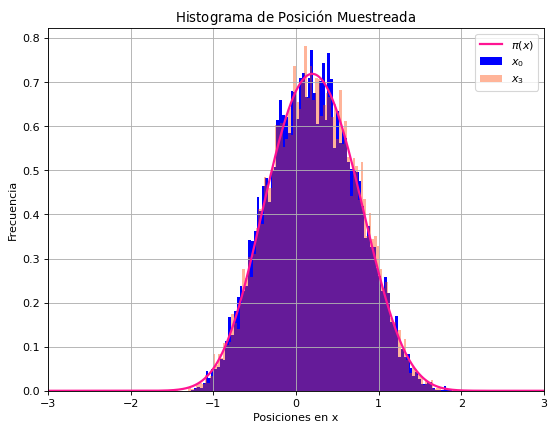

In [19]:


N=10
beta=4.0

"""Invocamos función para el cálculo del path integral"""
dtau,allX,x,hist,short_hist=path_integral_anharm(N)

filename='dat_files/data_anharm_matrixsquaring_beta4.0_nx1000_b00.03125'+'.dat'
list_x, list_y = read_file(filename)


fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot()

ax.hist(hist[0], density = True, bins = 100,color = "blue",label=r"$ x_0$")
ax.hist(hist[3], density = True, bins = 100,color = "#FF4500",alpha=0.4,label=r"$ x_3$")
ax.plot(list_x, list_y, linestyle='-', color='#FF1493', label = r"$\pi(x)$",linewidth=2)


ax.legend()

plt.xlabel('Posiciones en x')
plt.ylabel('Frecuencia')
plt.title(r'$\mathrm{Histograma\ de\ Posición\ Muestreada}\ $')
plt.grid(True)
plt.xlim([-3,3])

fig.savefig('plots/hist_anharm_compare1.png')


plt.show()

   

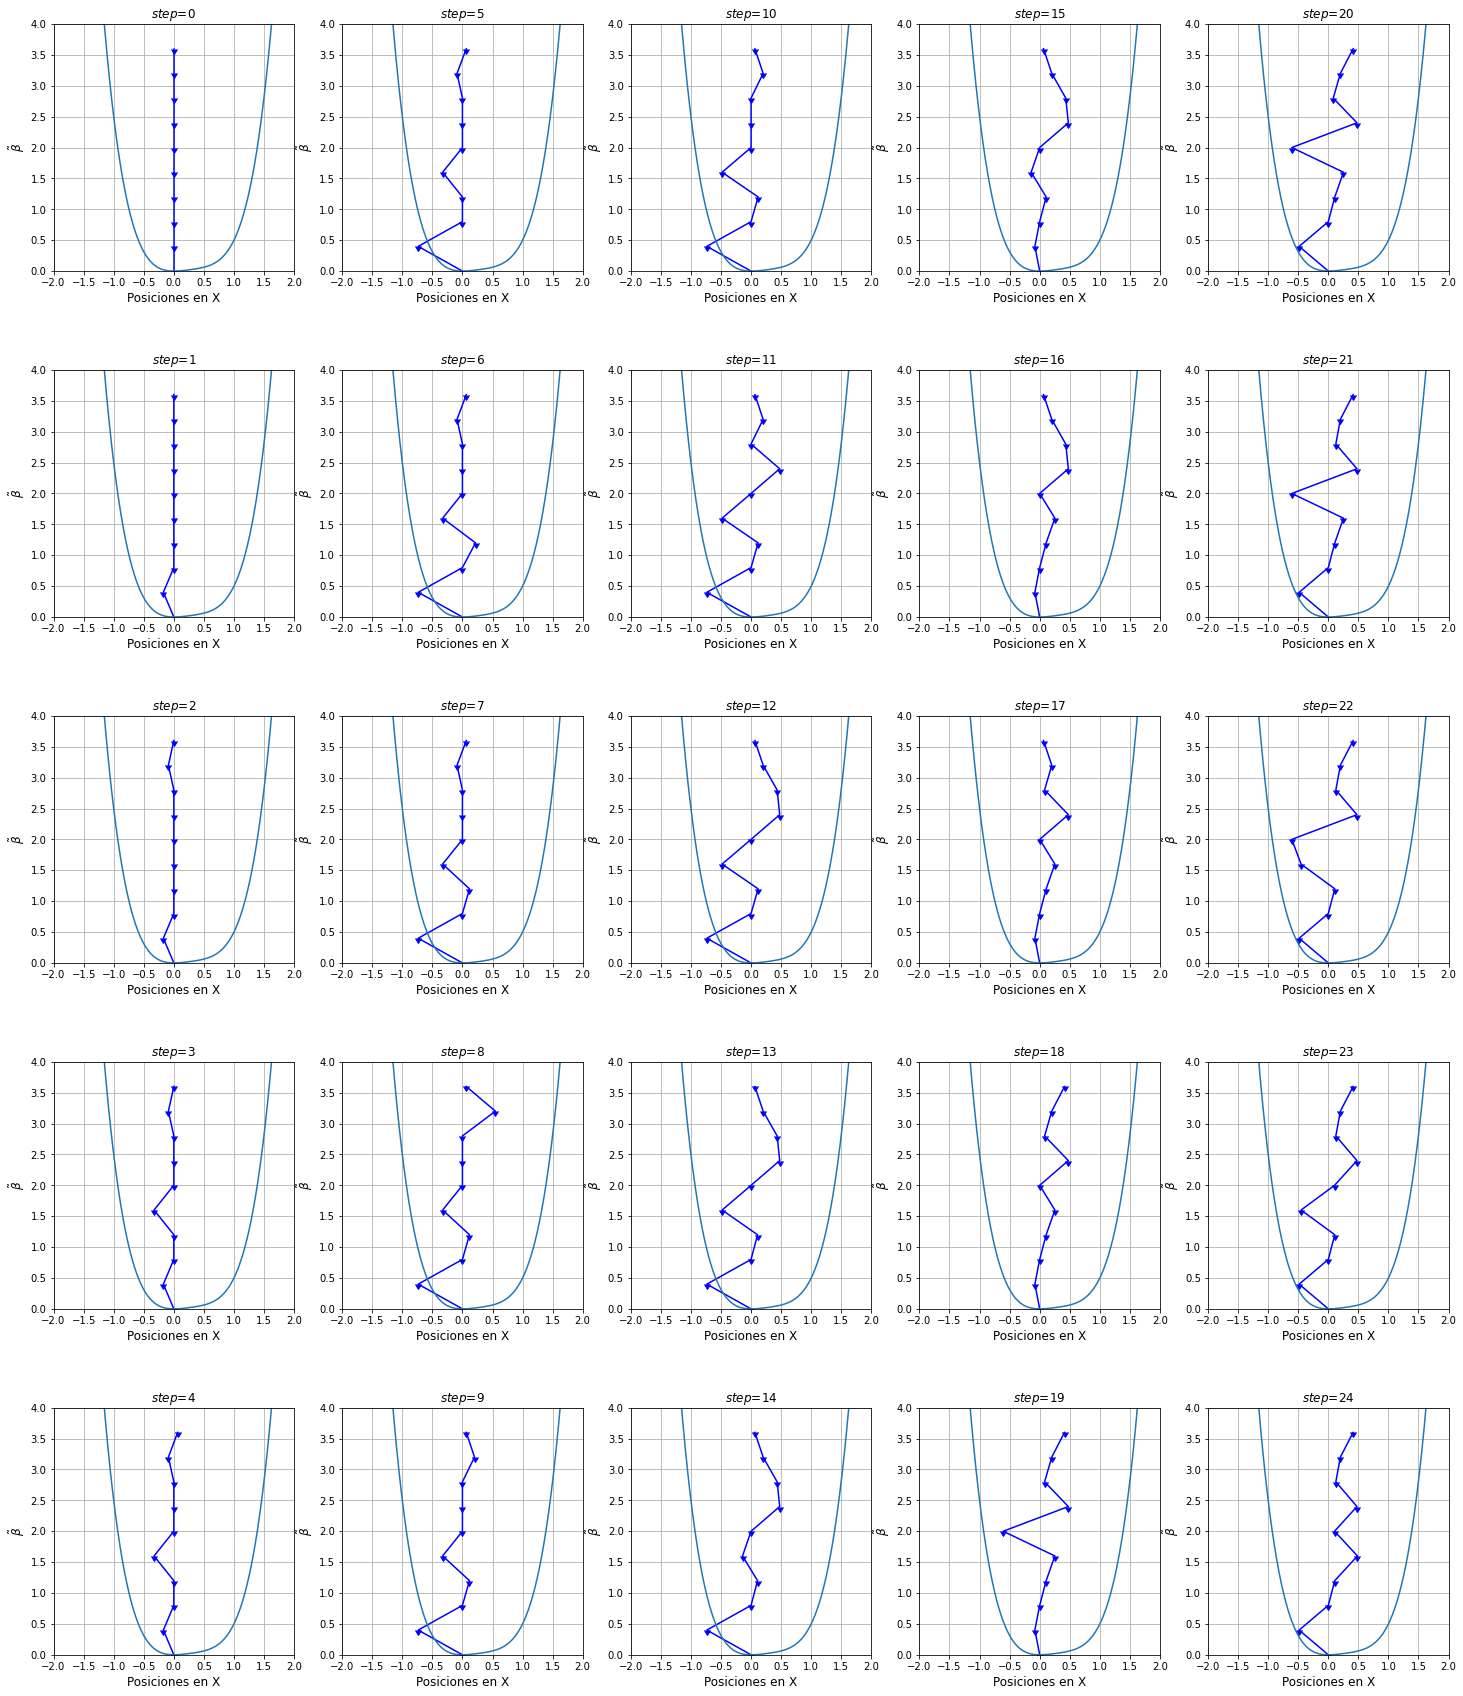

In [20]:
ncols=5 #número de columnas de plots
nrows = 5 #número de filas

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 30))
plt.subplots_adjust(hspace=0.4)

x_values = np.linspace(-2.0, 2.0, 1000)  #rango de posiciones
y_potential = v_anharmonic(x_values) #Cálculo del potencial para su graficación
counter=0


for col in range(0,ncols):
    for row in range(0,nrows):

        axs[row,col].plot(short_hist[counter],np.arange(0,beta,dtau),marker=11, linestyle='-', color='blue')
        axs[row,col].plot(x_values,y_potential)


        axs[row,col].title.set_text(r'$step$='+str(counter))
        axs[row,col].grid()
        #axs[row,col].legend(loc=1, prop={'size': 10})
        axs[row,col].set_xlim((-2, 2))
        counter += 1
    
    for ax in axs.flat:
        ax.set_xlabel('Posiciones en X',fontsize = 12.0)
        ax.set_ylabel(r'$\tilde{\beta}$',fontsize = 12.0)
        ax.set_xlim([-2,2])
        ax.set_ylim([0, beta])
        
fig.savefig('plots/initial_anharm_paths.png')

plt.show()


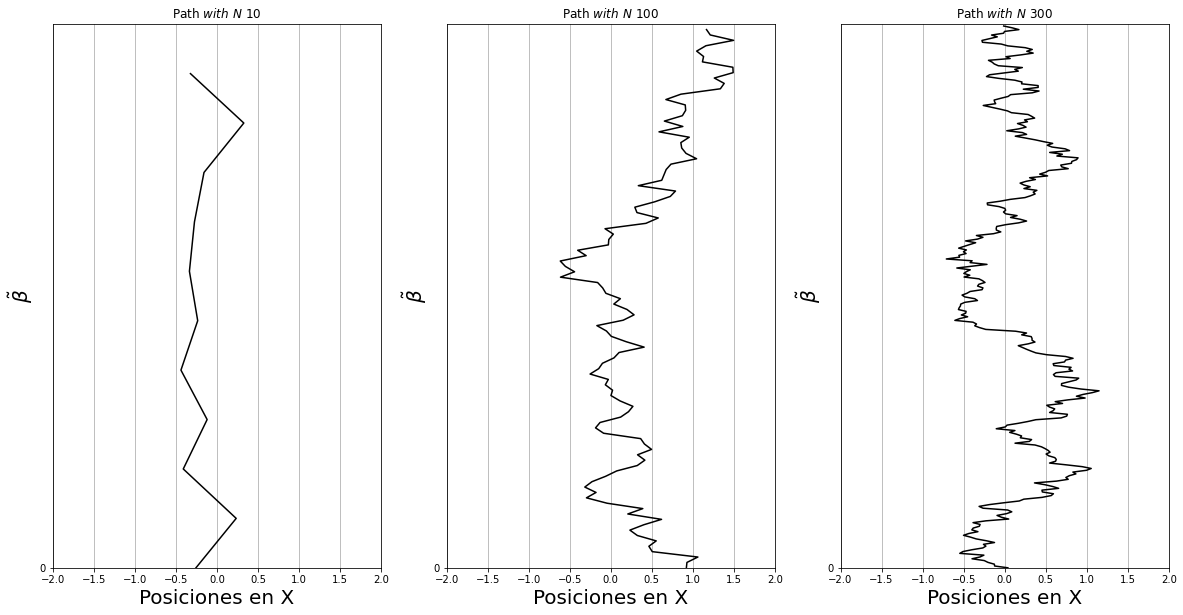

In [21]:

fig, axs = plt.subplots( ncols=3, figsize=(20, 10))
plt.subplots_adjust(hspace=1)

x_values = np.linspace(-4.0, 4.0, 2000)  #rango de posiciones
y_potential = 0.5*x_values**2

N_vals=[10,100,300]
beta=4.0

"""Aquí probamos el resultado de la integral de camino
para diferentes valor de N """
for index,N in enumerate(N_vals):
    
    """Invocamos función para el cálculo del path integral"""
    dtau,allX,x,hist,short_hist=path_integral_anharm(N+1)
    
    #for path in allX:
    #    axs[index].plot(path,np.arange(0,beta,dtau),alpha=0.6,color='red', linestyle='-')

    axs[index].plot(x,np.arange(0,beta,dtau),color="black", linestyle='-')
   
    axs[index].set_yticks(np.arange(0, beta, step=10))
    axs[index].title.set_text(r'$\mathrm{Path}\ with\  N\ %i $'%N)
    axs[index].grid(True)
    
    #axs[index].plot(x_values,y_potential, label="Pozo de Potencial V(x)=$x^2/2$")
    
for ax in axs.flat:
    ax.set_xlabel('Posiciones en X',fontsize = 20.0)
    ax.set_ylabel(r'$\tilde{\beta}$',fontsize = 20.0)

    ax.set_xlim([-2,2])
    ax.set_ylim([0, beta])

plt.ylim([0, beta])

fig.savefig('plots/paths_anharm_osc.png')

plt.show()
